IS620-Alex Satz

two mode network is project to one-mode.  This is done for both people (the first part) and events (the second part).  The imported data was originally worked up in R.

We see that Evelyn and Sylvia are the most connected, as they attend the most meetings that are attended by the most people.  They also attend as many meetings (in total) as several others.

We also see that Event-8 is the most attended by those who attend the most events.  Several events are otherwise attended equally.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
from networkx.algorithms import traversal
import pandas as pd

/Users/alexandersatz/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('/Users/alexandersatz/Documents/Cuny/IS620/Wk6_directed_projected.csv')

In [5]:
df[:5]

,Source,Target,Weight
0,EVELYN,LAURA,6
1,EVELYN,THERESA,7
2,EVELYN,BRENDA,6
3,EVELYN,CHARLOTTE,3
4,EVELYN,FRANCES,4


In [7]:
import networkx as nx
mygraph2 = nx.from_pandas_dataframe(df, 'Source', 'Target',['Weight'], create_using=nx.DiGraph())

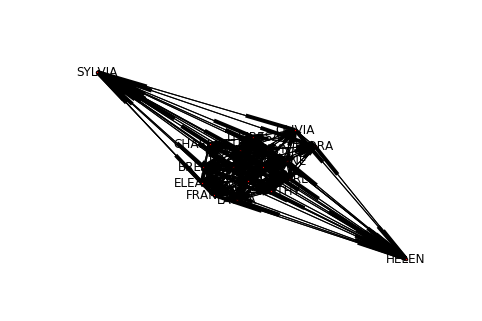

In [8]:
nx.draw_spring(mygraph2, with_labels=True, node_size=6)

In [9]:
from networkx import algorithms
d = algorithms.all_pairs_shortest_path(mygraph2)

In [10]:
#iterate over dictionary of shortest walk between all nodes, and find the longest path.
#this is the diameter.  The diameter is edges, and start is the name of the node that the path eminates from.

start = -1
end = -1
edges = -1
for key, value in d.iteritems():
    for k,v in value.iteritems():
        if (len(v)-1)> edges:
            edges = len(v)-1
            start = v[0]
            end = v[-1]

In [11]:
##  the diameter of the graph is only 2
print edges  ## diameter of the graph
print start  ## node it starts from

2
CHARLOTTE


In [12]:
ei = nx.eigenvector_centrality(mygraph2, max_iter=100000, tol=1e-06, nstart=None, weight='Weight')

In [14]:
##Evelyn and Sylvia seem the most connected, as shown below, they attend as many meetings as the others, 
## but seem to attend better attended meetings.

import operator
dict(sorted(ei.iteritems(), key=operator.itemgetter(1), reverse=True)[:10])

{'BRENDA': 0.2843422827997542,
 'EVELYN': 0.299135913974327,
 'HELEN': 0.2496409131087094,
 'KATHERINE': 0.2426352830513667,
 'LAURA': 0.28092886165237857,
 'NORA': 0.270364572860736,
 'RUTH': 0.23829262856112965,
 'SYLVIA': 0.29098955020992684,
 'THERESA': 0.3338244821340553,
 'VERNE': 0.23101283407684176}

In [15]:
#ignoring weights, many women are equally connected.
dc = nx.degree_centrality(mygraph2)  #note this does not take into account Weights
dict(sorted(dc.iteritems(), key=operator.itemgetter(1), reverse=True)[:10])

{'EVELYN': 2.0,
 'HELEN': 2.0,
 'KATHERINE': 1.8823529411764706,
 'MYRNA': 1.8823529411764706,
 'NORA': 2.0,
 'PEARL': 1.8823529411764706,
 'RUTH': 2.0,
 'SYLVIA': 2.0,
 'THERESA': 2.0,
 'VERNE': 2.0}

In [16]:
df = pd.read_csv('/Users/alexandersatz/Documents/Cuny/IS620/Wk6_events.csv')

In [17]:
df[:5]  ## these are events, ie 1 = event-1

,Source,Target,Weights
0,1,2,2
1,1,3,3
2,1,4,2
3,1,5,3
4,1,6,3


In [20]:
mygraph2 = nx.from_pandas_dataframe(df, 'Source', 'Target',['Weights'], create_using=nx.DiGraph())



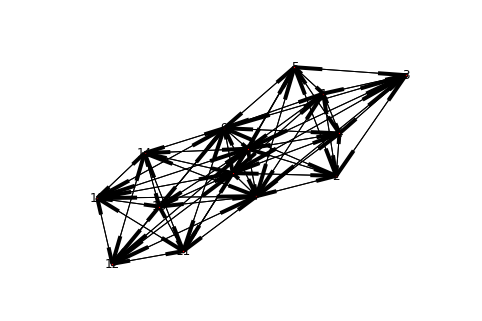

In [21]:
nx.draw_spring(mygraph2, with_labels=True, node_size=6)

In [22]:
## shown below, the diameter of the graph is 2.

d = algorithms.all_pairs_shortest_path(mygraph2)
#iterate over dictionary of shortest walk between all nodes, and find the longest path.
#this is the diameter.  The diameter is edges, and start is the name of the node that the path eminates from.

start = -1
end = -1
edges = -1
for key, value in d.iteritems():
    for k,v in value.iteritems():
        if (len(v)-1)> edges:
            edges = len(v)-1
            start = v[0]
            end = v[-1]
##  the diameter of the graph is only 2
print edges  ## diameter of the graph
print start  ## node it starts from

2
1


In [23]:
## Event 8 seems to have the most people showing up that also attend other events.

ei = nx.eigenvector_centrality(mygraph2, max_iter=100000, tol=1e-06, nstart=None, weight='Weights')
dict(sorted(ei.iteritems(), key=operator.itemgetter(1), reverse=True)[:10])

{3: 0.2518326052259101,
 4: 0.18428721429925238,
 5: 0.30462223199500216,
 6: 0.3160641945006132,
 7: 0.369434772831884,
 8: 0.4519284438752046,
 9: 0.35686177876971853,
 10: 0.22826052012227285,
 12: 0.2551203767943779,
 13: 0.17743546502041416}

In [24]:

# Ignoring weights, several events are equally well attended.  
# But as shown above, event 8 is attend by those who attend many other events.
dc = nx.degree_centrality(mygraph2)  #note this does not take into account Weights
dict(sorted(dc.iteritems(), key=operator.itemgetter(1), reverse=True)[:10])

{1: 1.2307692307692308,
 2: 1.2307692307692308,
 3: 1.2307692307692308,
 4: 1.2307692307692308,
 5: 1.2307692307692308,
 6: 2.0,
 7: 2.0,
 8: 2.0,
 9: 2.0,
 10: 1.2307692307692308}